## CS 439 - Introduction to Data Science
### Spring 2020

# Final Project: Movie Rating Predictor

<h3>Student Information</h3> Please provide information about yourself. We will NOT grade this submissing w/o all the information<br>
<b>Name</b>: Kaavya Krishna-Kumar, Arjun Sehgal<br>
<b>NetID</b>: kk859, as2591<br>
<b>Recitation</b>: 01<br>
<b>Notes to Grader</b> (optional):<br>

## Contents 
1. [Summary of Project](#Summary-of-Project)
2. [Getting Data](#Getting-Data)
3. [Data Exploration](#Data-Exploration)
    1. [Credits Table Info](#Credits-Table-Info)
    2. [Movies Table Info](#Movies-Table-Info)
4. [Descriptive Statistics](#Descriptive-Statistics)
    1. [MEANS](#MEANS)
    2. [STANDARD DEVIATION](#STANDARD-DEVIATION)
    3. [MODES](#MODES)
    4. [TESTS](#TESTS)
    5. [DISTRIBUTIONS](#DISTRIBUTIONS)
5. [Data Analysis, Visualization, and Insights](#Data-Analysis,-Visualization,-and-Insights)

<h3>Summary of Project</h3>

[Back to Contents](#Contents)

For our project we would like to create a model that predicts the success rate of a box office movie such as a fail, hit, or superhit. The premise of this project stemmed from answering the question of whether we could predict the success of the movie only knowing data about a movie prior to  release.<br>

While answering this question, a few question we first asked ourselves were:
* What parameters best predict the success rate of the movie (genre, director, budget, etc.)?
* Which cast or actor best predict the movies?
* Can we look at the genre of the movie to help classify?
* Does the time the movie is released throughout the year influence how the movie does?


## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json

# Getting Data

[Back to Contents](#Contents)

We will work with the The Movie Dataset (TMDb 5000). The site metadata is available from the page

https://www.kaggle.com/tmdb/tmdb-movie-metadata/data

In [2]:
#Import movies.csv

import utils
data_dir = 'data'

data_url = 'https://www.kaggle.com/tmdb/tmdb-movie-metadata/data'

file_name_2 = 'tmdb_5000_movies.csv'

# To retrieve the dataset, we will use the `utils.fetch_and_cache` utility from utils library. 
dest_path = utils.fetch_and_cache(data_url=data_url, file=file_name_2,data_dir=data_dir)
print(f'Located at {dest_path}')

Using version already downloaded: Tue Apr  7 19:36:43 2020
MD5 hash of file: 64346a71897b5741d553d34b86088603
Located at data\tmdb_5000_movies.csv


## Data Exploration
[Back to Contents](#Contents)

In [3]:
credits = pd.read_csv('./data/tmdb_5000_credits.csv')
movies = pd.read_csv('./data/tmdb_5000_movies.csv')

In [4]:
movies.shape

(4803, 20)

In [5]:
credits.shape

(4803, 4)

In [6]:
credits.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
credits.info()
credits.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


### Credits Table Info
Credits has four coloumns of features with the following info <br>

[Back to Contents](#Contents)

* movie_id : int which is a unique identifier for the movie
* title : categorical identifier for the title of the movie
* cast: JSON that has the following info for the data: 
    * cast_id
    * character
    * credit_id
    * gender
    * id
    * name
    * order
* credit : JSON that has the movie creddit info for the specific movie: 
    * credit_id
    * department
    * gender
    * id
    * job
    * name


In [8]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
movies.info()
movies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Movies Table Info
[Back to Contents](#Contents)

Movies has 20 coloumns of features with the following info <br>

* budget : movie budget
* genres : JSON object with following data
    * id : genre id
    * name : name of genre which the movie falls into
* homepage : the URL for the movie's website
* id : movie id
* keywords: JSON object with the following data
    * id: id for keyword
    * name: keyword name for the movie
* orginal_language: acronym for the original lalnguage the movie was made in 
* original_title: original title of the movie
* overview : description of movie
* popularity : rating of movie popularity
* production_companies : JSON object with the following data : 
    * id - production company id
    * name - production comapany name
* production_countries: JSON object with the following data : 
    * iso_3166_1 : ISO code for the countries
    * name : Country name that movie was released in
* release_date : release date
* revenue : movie revenue
* runtime: runtime
* spoken_languages: JSON object with the following data : 
    * iso_639_1 : Code for the language
    * name : language name
* status: movie status (released, rumored, post production
* tagline : movie tagline
* title : movie title
* vote_average : average vote
* vote_count : vote count


## Data Processing
[Back to Contents](#Contents)

In this section I would like to merge the two tables into one and remove uneccsary columns from the tables. I would also like to tackle converting the JSON objects into usable data. Lastly, I cleaned up the tables and removed some columns that were not necessary

In [4]:
all_movies = pd.merge(left=credits, right=movies, left_on = 'movie_id', right_on = 'id', suffixes=('_left', '_right'))
all_movies.head()

,movie_id,title_left,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_right,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
#Movie id and Movie title are repeated from both tables, delete those columns and rename existing
#original_title seems uneeded right now. Drop that column as well
all_movies.drop(['id' , 'title_right', 'original_title'], axis=1, inplace=True)
all_movies=all_movies.rename(columns = {'title_left':'title'})
all_movies.head()


,movie_id,title,cast,crew,budget,genres,homepage,keywords,original_language,overview,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124


In [6]:
#I wanted to reorder the table to have the most important columns in the beginning to be able to view and access data
# more logically

all_movies = all_movies[['movie_id','title', 'budget', 'status', 'tagline', 'release_date', 'runtime', 
               'genres',  'popularity', 'revenue', 'vote_average',
               'vote_count', 'cast', 'crew', 'homepage', 'keywords', 'production_companies', 'production_countries', 'spoken_languages', 'original_language', 'overview' ]]
all_movies.head()

,movie_id,title,budget,status,tagline,release_date,runtime,genres,popularity,revenue,...,vote_count,cast,crew,homepage,keywords,production_companies,production_countries,spoken_languages,original_language,overview
0,19995,Avatar,237000000,Released,Enter the World of Pandora.,2009-12-10,162.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,2787965087,...,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",en,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,300000000,Released,"At the end of the world, the adventure begins.",2007-05-19,169.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,961000000,...,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",en,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,245000000,Released,A Plan No One Escapes,2015-10-26,148.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,880674609,...,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",en,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,250000000,Released,The Legend Ends,2012-07-16,165.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,1084939099,...,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",en,Following the death of District Attorney Harve...
4,49529,John Carter,260000000,Released,"Lost in our world, found in another.",2012-03-07,132.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,284139100,...,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",en,"John Carter is a war-weary, former military ca..."


In [7]:
#crew lists all of crew members. Which should I pull out? Director or Writer?
pd.set_option('display.max_colwidth', 50)
all_movies['crew'].head(1)

0    [{"credit_id": "52fe48009251416c750aca23", "de...
Name: crew, dtype: object

In [8]:
#extract data from  crew
#crew = all_movies['crew'].apply(json.loads)
#pd.DataFrame(crew.tolist()) 

In [9]:
json_columns = ['genres', 'keywords', 'production_countries','production_companies', 'spoken_languages']

for column in json_columns:
    all_movies[column] = all_movies[column].apply(json.loads, encoding="utf-8")
all_movies['crew'] = all_movies['crew'].apply(json.loads, encoding="utf-8")    
all_movies['cast'] = all_movies['cast'].apply(json.loads, encoding="utf-8")    

In [10]:
def process_jsoncols(colname):
    jsoncollist=[]
    for x in colname:
        jsoncollist.append(x['name'])
    return jsoncollist

for colname in json_columns:
    all_movies[colname] = all_movies[colname].apply(process_jsoncols)
    
all_movies.head()

,movie_id,title,budget,status,tagline,release_date,runtime,genres,popularity,revenue,...,vote_count,cast,crew,homepage,keywords,production_companies,production_countries,spoken_languages,original_language,overview
0,19995,Avatar,237000000,Released,Enter the World of Pandora.,2009-12-10,162.0,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,2787965087,...,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",http://www.avatarmovie.com/,"[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[English, Español]",en,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,300000000,Released,"At the end of the world, the adventure begins.",2007-05-19,169.0,"[Adventure, Fantasy, Action]",139.082615,961000000,...,4500,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",http://disney.go.com/disneypictures/pirates/,"[ocean, drug abuse, exotic island, east india ...","[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],[English],en,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,245000000,Released,A Plan No One Escapes,2015-10-26,148.0,"[Action, Adventure, Crime]",107.376788,880674609,...,4466,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",http://www.sonypictures.com/movies/spectre/,"[spy, based on novel, secret agent, sequel, mi...","[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]","[Français, English, Español, Italiano, Deutsch]",en,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,250000000,Released,The Legend Ends,2012-07-16,165.0,"[Action, Crime, Drama, Thriller]",112.312950,1084939099,...,9106,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",http://www.thedarkknightrises.com/,"[dc comics, crime fighter, terrorist, secret i...","[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],[English],en,Following the death of District Attorney Harve...
4,49529,John Carter,260000000,Released,"Lost in our world, found in another.",2012-03-07,132.0,"[Action, Adventure, Science Fiction]",43.926995,284139100,...,2124,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",http://movies.disney.com/john-carter,"[based on novel, mars, medallion, space travel...",[Walt Disney Pictures],[United States of America],[English],en,"John Carter is a war-weary, former military ca..."


When taking a look again at the data, we decided that 'production_countries', and 'spoken_languages' are not as vital in describing which movies have a better success rate, thus we are going to drop them from the table.

In [11]:
all_movies.drop(['production_countries' , 'spoken_languages'], axis=1, inplace=True)


Crew and cast are unique because they contain all the cast nad crew for the movie. For our studies right now we decided to take the primary actor for each movie in the cast column and take the Director and Writer from the crew column.

In [12]:
#Taking the first actor from the cast json
for index,x in zip(all_movies.index,all_movies['cast']):
    castlist=[]
    for i in range(len(x)):
        if (x[i]['order'] < 1):
            castlist.append((x[i]['name']))
    all_movies.loc[index,'cast']=str(castlist)

In [19]:
all_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4803 non-null   int64  
 1   title                 4803 non-null   object 
 2   budget                4803 non-null   int64  
 3   status                4803 non-null   object 
 4   tagline               3959 non-null   object 
 5   release_date          4802 non-null   object 
 6   runtime               4801 non-null   float64
 7   genres                4803 non-null   object 
 8   popularity            4803 non-null   float64
 9   revenue               4803 non-null   int64  
 10  vote_average          4803 non-null   float64
 11  vote_count            4803 non-null   int64  
 12  cast                  4803 non-null   object 
 13  crew                  4803 non-null   object 
 14  homepage              1712 non-null   object 
 15  keywords             

In [13]:
#reformatting Cast to be a properly formatted string for reading. Rename to actor
all_movies['cast'] = all_movies['cast'].str.strip('[]')
all_movies['cast'] = all_movies['cast'].str.replace("'", '')
all_movies=all_movies.rename(columns = {'cast':'actor'})
all_movies.head()

,movie_id,title,budget,status,tagline,release_date,runtime,genres,popularity,revenue,vote_average,vote_count,actor,crew,homepage,keywords,production_companies,original_language,overview
0,19995,Avatar,237000000,Released,Enter the World of Pandora.,2009-12-10,162.0,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,2787965087,7.2,11800,Sam Worthington,"[{'credit_id': '52fe48009251416c750aca23', 'de...",http://www.avatarmovie.com/,"[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...",en,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,300000000,Released,"At the end of the world, the adventure begins.",2007-05-19,169.0,"[Adventure, Fantasy, Action]",139.082615,961000000,6.9,4500,Johnny Depp,"[{'credit_id': '52fe4232c3a36847f800b579', 'de...",http://disney.go.com/disneypictures/pirates/,"[ocean, drug abuse, exotic island, east india ...","[Walt Disney Pictures, Jerry Bruckheimer Films...",en,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,245000000,Released,A Plan No One Escapes,2015-10-26,148.0,"[Action, Adventure, Crime]",107.376788,880674609,6.3,4466,Daniel Craig,"[{'credit_id': '54805967c3a36829b5002c41', 'de...",http://www.sonypictures.com/movies/spectre/,"[spy, based on novel, secret agent, sequel, mi...","[Columbia Pictures, Danjaq, B24]",en,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,250000000,Released,The Legend Ends,2012-07-16,165.0,"[Action, Crime, Drama, Thriller]",112.312950,1084939099,7.6,9106,Christian Bale,"[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",http://www.thedarkknightrises.com/,"[dc comics, crime fighter, terrorist, secret i...","[Legendary Pictures, Warner Bros., DC Entertai...",en,Following the death of District Attorney Harve...
4,49529,John Carter,260000000,Released,"Lost in our world, found in another.",2012-03-07,132.0,"[Action, Adventure, Science Fiction]",43.926995,284139100,6.1,2124,Taylor Kitsch,"[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",http://movies.disney.com/john-carter,"[based on novel, mars, medallion, space travel...",[Walt Disney Pictures],en,"John Carter is a war-weary, former military ca..."


In [14]:
#making a copy of df just incase
amdf = all_movies.copy()
amdf.head()

,movie_id,title,budget,status,tagline,release_date,runtime,genres,popularity,revenue,vote_average,vote_count,actor,crew,homepage,keywords,production_companies,original_language,overview
0,19995,Avatar,237000000,Released,Enter the World of Pandora.,2009-12-10,162.0,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,2787965087,7.2,11800,Sam Worthington,"[{'credit_id': '52fe48009251416c750aca23', 'de...",http://www.avatarmovie.com/,"[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...",en,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,300000000,Released,"At the end of the world, the adventure begins.",2007-05-19,169.0,"[Adventure, Fantasy, Action]",139.082615,961000000,6.9,4500,Johnny Depp,"[{'credit_id': '52fe4232c3a36847f800b579', 'de...",http://disney.go.com/disneypictures/pirates/,"[ocean, drug abuse, exotic island, east india ...","[Walt Disney Pictures, Jerry Bruckheimer Films...",en,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,245000000,Released,A Plan No One Escapes,2015-10-26,148.0,"[Action, Adventure, Crime]",107.376788,880674609,6.3,4466,Daniel Craig,"[{'credit_id': '54805967c3a36829b5002c41', 'de...",http://www.sonypictures.com/movies/spectre/,"[spy, based on novel, secret agent, sequel, mi...","[Columbia Pictures, Danjaq, B24]",en,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,250000000,Released,The Legend Ends,2012-07-16,165.0,"[Action, Crime, Drama, Thriller]",112.312950,1084939099,7.6,9106,Christian Bale,"[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",http://www.thedarkknightrises.com/,"[dc comics, crime fighter, terrorist, secret i...","[Legendary Pictures, Warner Bros., DC Entertai...",en,Following the death of District Attorney Harve...
4,49529,John Carter,260000000,Released,"Lost in our world, found in another.",2012-03-07,132.0,"[Action, Adventure, Science Fiction]",43.926995,284139100,6.1,2124,Taylor Kitsch,"[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",http://movies.disney.com/john-carter,"[based on novel, mars, medallion, space travel...",[Walt Disney Pictures],en,"John Carter is a war-weary, former military ca..."


In [22]:
#for index,x in zip(all_movies.index,all_movies['crew']):
#    crewlist=[]
#    for i in range(len(x)):
#        if (x[i]['job'] == 'Director' or ['job'] == 'Writer'):
#            crewlist.append((x[i]['job'], x[i]['name']))
#    all_movies.loc[index,'crew']=str(crewlist)

When we tried to take the Writer and director we saw that not all movies had Writer listed so we only pulled director right now

In [15]:
for index,x in zip(all_movies.index,all_movies['crew']):
    crewlist=[]
    for i in range(len(x)):
        if (x[i]['job'] == 'Director'):
            crewlist.append((x[i]['name']))
    all_movies.loc[index,'crew']=str(crewlist)

In [16]:
#reformatting crew to be a properly formatted string for reading. Rename to director
all_movies['crew'] = all_movies['crew'].str.strip('[]')
all_movies['crew'] = all_movies['crew'].str.replace("'", '')
all_movies=all_movies.rename(columns = {'crew':'director'})
all_movies.head()

,movie_id,title,budget,status,tagline,release_date,runtime,genres,popularity,revenue,vote_average,vote_count,actor,director,homepage,keywords,production_companies,original_language,overview
0,19995,Avatar,237000000,Released,Enter the World of Pandora.,2009-12-10,162.0,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,2787965087,7.2,11800,Sam Worthington,James Cameron,http://www.avatarmovie.com/,"[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...",en,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,300000000,Released,"At the end of the world, the adventure begins.",2007-05-19,169.0,"[Adventure, Fantasy, Action]",139.082615,961000000,6.9,4500,Johnny Depp,Gore Verbinski,http://disney.go.com/disneypictures/pirates/,"[ocean, drug abuse, exotic island, east india ...","[Walt Disney Pictures, Jerry Bruckheimer Films...",en,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,245000000,Released,A Plan No One Escapes,2015-10-26,148.0,"[Action, Adventure, Crime]",107.376788,880674609,6.3,4466,Daniel Craig,Sam Mendes,http://www.sonypictures.com/movies/spectre/,"[spy, based on novel, secret agent, sequel, mi...","[Columbia Pictures, Danjaq, B24]",en,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,250000000,Released,The Legend Ends,2012-07-16,165.0,"[Action, Crime, Drama, Thriller]",112.312950,1084939099,7.6,9106,Christian Bale,Christopher Nolan,http://www.thedarkknightrises.com/,"[dc comics, crime fighter, terrorist, secret i...","[Legendary Pictures, Warner Bros., DC Entertai...",en,Following the death of District Attorney Harve...
4,49529,John Carter,260000000,Released,"Lost in our world, found in another.",2012-03-07,132.0,"[Action, Adventure, Science Fiction]",43.926995,284139100,6.1,2124,Taylor Kitsch,Andrew Stanton,http://movies.disney.com/john-carter,"[based on novel, mars, medallion, space travel...",[Walt Disney Pictures],en,"John Carter is a war-weary, former military ca..."


In [25]:
#make lists a string!
#json_columns = ['genres', 'keywords', 'production_companies']
#for colname in json_columns:
#    all_movies[colname] = all_movies[colname].apply(lambda x: ','.join(map(str, x)))

In [17]:
amdf3 = all_movies.copy()

In [18]:
#make lists a string!
json_columns = ['genres', 'keywords', 'production_companies']
for colname in json_columns:
    all_movies[colname] = all_movies[colname].apply(lambda x: ','.join(map(str, x)))

In [19]:
all_movies.head()

,movie_id,title,budget,status,tagline,release_date,runtime,genres,popularity,revenue,vote_average,vote_count,actor,director,homepage,keywords,production_companies,original_language,overview
0,19995,Avatar,237000000,Released,Enter the World of Pandora.,2009-12-10,162.0,"Action,Adventure,Fantasy,Science Fiction",150.437577,2787965087,7.2,11800,Sam Worthington,James Cameron,http://www.avatarmovie.com/,"culture clash,future,space war,space colony,so...","Ingenious Film Partners,Twentieth Century Fox ...",en,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,300000000,Released,"At the end of the world, the adventure begins.",2007-05-19,169.0,"Adventure,Fantasy,Action",139.082615,961000000,6.9,4500,Johnny Depp,Gore Verbinski,http://disney.go.com/disneypictures/pirates/,"ocean,drug abuse,exotic island,east india trad...","Walt Disney Pictures,Jerry Bruckheimer Films,S...",en,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,245000000,Released,A Plan No One Escapes,2015-10-26,148.0,"Action,Adventure,Crime",107.376788,880674609,6.3,4466,Daniel Craig,Sam Mendes,http://www.sonypictures.com/movies/spectre/,"spy,based on novel,secret agent,sequel,mi6,bri...","Columbia Pictures,Danjaq,B24",en,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,250000000,Released,The Legend Ends,2012-07-16,165.0,"Action,Crime,Drama,Thriller",112.312950,1084939099,7.6,9106,Christian Bale,Christopher Nolan,http://www.thedarkknightrises.com/,"dc comics,crime fighter,terrorist,secret ident...","Legendary Pictures,Warner Bros.,DC Entertainme...",en,Following the death of District Attorney Harve...
4,49529,John Carter,260000000,Released,"Lost in our world, found in another.",2012-03-07,132.0,"Action,Adventure,Science Fiction",43.926995,284139100,6.1,2124,Taylor Kitsch,Andrew Stanton,http://movies.disney.com/john-carter,"based on novel,mars,medallion,space travel,pri...",Walt Disney Pictures,en,"John Carter is a war-weary, former military ca..."


In [20]:
#one more copy 
all_movies_final = all_movies.copy()

## Descriptive Statistics
[Back to Contents](#Contents)

In [30]:
all_movies.head()
##Quickly displaying column names as well as first 5 movies in our database

,movie_id,title,budget,status,tagline,release_date,runtime,genres,popularity,revenue,vote_average,vote_count,actor,director,homepage,keywords,production_companies,original_language,overview
0,19995,Avatar,237000000,Released,Enter the World of Pandora.,2009-12-10,162.0,"Action,Adventure,Fantasy,Science Fiction",150.437577,2787965087,7.2,11800,Sam Worthington,James Cameron,http://www.avatarmovie.com/,"culture clash,future,space war,space colony,so...","Ingenious Film Partners,Twentieth Century Fox ...",en,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,300000000,Released,"At the end of the world, the adventure begins.",2007-05-19,169.0,"Adventure,Fantasy,Action",139.082615,961000000,6.9,4500,Johnny Depp,Gore Verbinski,http://disney.go.com/disneypictures/pirates/,"ocean,drug abuse,exotic island,east india trad...","Walt Disney Pictures,Jerry Bruckheimer Films,S...",en,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,245000000,Released,A Plan No One Escapes,2015-10-26,148.0,"Action,Adventure,Crime",107.376788,880674609,6.3,4466,Daniel Craig,Sam Mendes,http://www.sonypictures.com/movies/spectre/,"spy,based on novel,secret agent,sequel,mi6,bri...","Columbia Pictures,Danjaq,B24",en,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,250000000,Released,The Legend Ends,2012-07-16,165.0,"Action,Crime,Drama,Thriller",112.312950,1084939099,7.6,9106,Christian Bale,Christopher Nolan,http://www.thedarkknightrises.com/,"dc comics,crime fighter,terrorist,secret ident...","Legendary Pictures,Warner Bros.,DC Entertainme...",en,Following the death of District Attorney Harve...
4,49529,John Carter,260000000,Released,"Lost in our world, found in another.",2012-03-07,132.0,"Action,Adventure,Science Fiction",43.926995,284139100,6.1,2124,Taylor Kitsch,Andrew Stanton,http://movies.disney.com/john-carter,"based on novel,mars,medallion,space travel,pri...",Walt Disney Pictures,en,"John Carter is a war-weary, former military ca..."


In [31]:
all_movies.tail()
##Quickly displaying column names as well as last 5 movies in our database

,movie_id,title,budget,status,tagline,release_date,runtime,genres,popularity,revenue,vote_average,vote_count,actor,director,homepage,keywords,production_companies,original_language,overview
4798,9367,El Mariachi,220000,Released,"He didn't come looking for trouble, but troubl...",1992-09-04,81.0,"Action,Crime,Thriller",14.269792,2040920,6.6,238,Carlos Gallardo,Robert Rodriguez,NaN,"united states–mexico barrier,legs,arms,paper k...",Columbia Pictures,es,El Mariachi just wants to play his guitar and ...
4799,72766,Newlyweds,9000,Released,A newlywed couple's honeymoon is upended by th...,2011-12-26,85.0,"Comedy,Romance",0.642552,0,5.9,5,Edward Burns,Edward Burns,NaN,,,en,A newlywed couple's honeymoon is upended by th...
4800,231617,"Signed, Sealed, Delivered",0,Released,NaN,2013-10-13,120.0,"Comedy,Drama,Romance,TV Movie",1.444476,0,7.0,6,Eric Mabius,Scott Smith,http://www.hallmarkchannel.com/signedsealeddel...,"date,love at first sight,narration,investigati...","Front Street Pictures,Muse Entertainment Enter...",en,"""Signed, Sealed, Delivered"" introduces a dedic..."
4801,126186,Shanghai Calling,0,Released,A New Yorker in Shanghai,2012-05-03,98.0,,0.857008,0,5.7,7,Daniel Henney,Daniel Hsia,http://shanghaicalling.com/,,,en,When ambitious New York attorney Sam is sent t...
4802,25975,My Date with Drew,0,Released,NaN,2005-08-05,90.0,Documentary,1.929883,0,6.3,16,Drew Barrymore,"Brian Herzlinger, Jon Gunn, Brett Winn",NaN,"obsession,camcorder,crush,dream girl","rusty bear entertainment,lucky crow films",en,Ever since the second grade when he first saw ...


##### MEANS
[Back to Contents](#Contents)

In [32]:
all_movies[['budget', 'runtime', 'revenue', 'vote_average', 'vote_count']].mean().astype(int)
##Calculates the means of all of these categories

budget          29045039
runtime              106
revenue         82260638
vote_average           6
vote_count           690
dtype: int32

WHAT DOES THIS MEAN?

##### STANDARD DEVIATION
[Back to Contents](#Contents)

In [33]:
all_movies[['budget', 'runtime', 'revenue', 'vote_average', 'vote_count']].std().astype(int)
##Calculates the standard deviation of all of these categories

budget           40722391
runtime                22
revenue         162857100
vote_average            1
vote_count           1234
dtype: int32

WHAT DOES THIS MEAN?

##### MODES
[Back to Contents](#Contents)

In [34]:
all_movies[['budget', 'runtime', 'revenue', 'vote_average', 'vote_count']].mode()
## do we need to get rid of outliers that cause zeros to occurr? did they not have a recorded budget/revenue? etc?

,budget,runtime,revenue,vote_average,vote_count
0,0.0,90.0,0.0,6.0,0.0
1,NaN,NaN,NaN,6.5,NaN


##### TESTS
[Back to Contents](#Contents)

In [35]:
## Here we wanted to see how many movies certain actors appeared in, what is the average rating for the movies they
## acted in, and so on (tests really)
dCraig = all_movies[all_movies["actor"] == "Daniel Craig"]

dCraig

,movie_id,title,budget,status,tagline,release_date,runtime,genres,popularity,revenue,vote_average,vote_count,actor,director,homepage,keywords,production_companies,original_language,overview
2,206647,Spectre,245000000,Released,A Plan No One Escapes,2015-10-26,148.0,"Action,Adventure,Crime",107.376788,880674609,6.3,4466,Daniel Craig,Sam Mendes,http://www.sonypictures.com/movies/spectre/,"spy,based on novel,secret agent,sequel,mi6,bri...","Columbia Pictures,Danjaq,B24",en,A cryptic message from Bond’s past sends him o...
11,10764,Quantum of Solace,200000000,Released,"For love, for hate, for justice, for revenge.",2008-10-30,106.0,"Adventure,Action,Thriller,Crime",107.928811,586090727,6.1,2965,Daniel Craig,Marc Forster,http://www.mgm.com/view/movie/234/Quantum-of-S...,"killing,undercover,secret agent,british secret...",Eon Productions,en,Quantum of Solace continues the adventures of ...
29,37724,Skyfall,200000000,Released,Think on your sins.,2012-10-25,143.0,"Action,Adventure,Thriller",93.004993,1108561013,6.9,7604,Daniel Craig,Sam Mendes,http://www.skyfall-movie.com,"spy,secret agent,sociopath,killer,art gallery,...",Columbia Pictures,en,When Bond's latest assignment goes gravely wro...
277,36557,Casino Royale,150000000,Released,Everyone has a past. Every legend has a beginn...,2006-11-14,144.0,"Adventure,Action,Thriller",88.935165,599045960,7.3,3855,Daniel Craig,Martin Campbell,http://www.mgm.com/#/our-titles/233/Casino-Roy...,"italy,poker,casino,terrorist,banker,money,free...","Eon Productions,Stillking Films,Babelsberg Film",en,"Le Chiffre, a banker to the world's terrorists..."
354,65754,The Girl with the Dragon Tattoo,90000000,Released,Evil shall with evil be expelled.,2011-12-14,158.0,"Thriller,Crime,Mystery,Drama",47.651083,232617430,7.2,2434,Daniel Craig,David Fincher,http://dragontattoo.com/,"rape,journalist,based on novel,journalism,hack...","Columbia Pictures,Scott Rudin Productions,Film...",en,This English-language adaptation of the Swedis...
987,69668,Dream House,50000000,Released,"Once upon a time, there were two little girls ...",2011-09-30,84.0,"Drama,Thriller,Mystery",19.267479,38502340,5.8,391,Daniel Craig,Jim Sheridan,NaN,"house fire,extension ladder,last day on job","Cliffjack Motion Pictures,Morgan Creek Product...",en,"Publisher, Will Atenton quits a lucrative job ..."
2389,9389,Renaissance,18000000,Released,Paris 2054. Live forever or die trying,2006-03-16,105.0,"Action,Animation,Science Fiction",9.244181,1831348,6.7,77,Daniel Craig,Christian Volckman,NaN,"paris,japanese,identity,underworld,monopoly,fu...","Onyx Films,Backup Films,France2 Cinéma,Centre ...",fr,To find Ilona and unlock the secrets of her di...
3431,4836,Layer Cake,6500000,Released,NaN,2004-09-30,105.0,"Drama,Thriller,Crime",24.003400,11850214,7.0,559,Daniel Craig,Matthew Vaughn,http://www.sonypictures.co.uk/homevideo/layerc...,"kidnapping,ecstasy,drug traffic,drug mule,hitm...","Sony Pictures Classics,Marv Films",en,When a seemingly straight-forward drug deal go...


In [36]:
dCraig[['vote_average']].mean()

vote_average    6.6625
dtype: float64

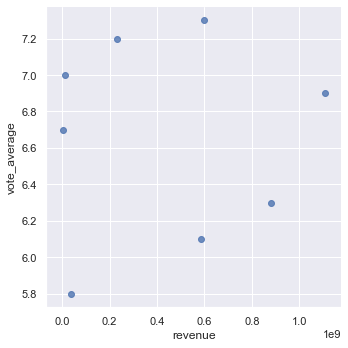

In [37]:
#dCraig.plot(kind = 'scatter', x = 'revenue', y = 'vote_average', color = 'red')
#plt.show()
sns.set(rc={'figure.figsize':(100,100)})
sns.lmplot(x='revenue', y='vote_average', data=dCraig, fit_reg=False)

##### DISTRIBUTIONS
[Back to Contents](#Contents)

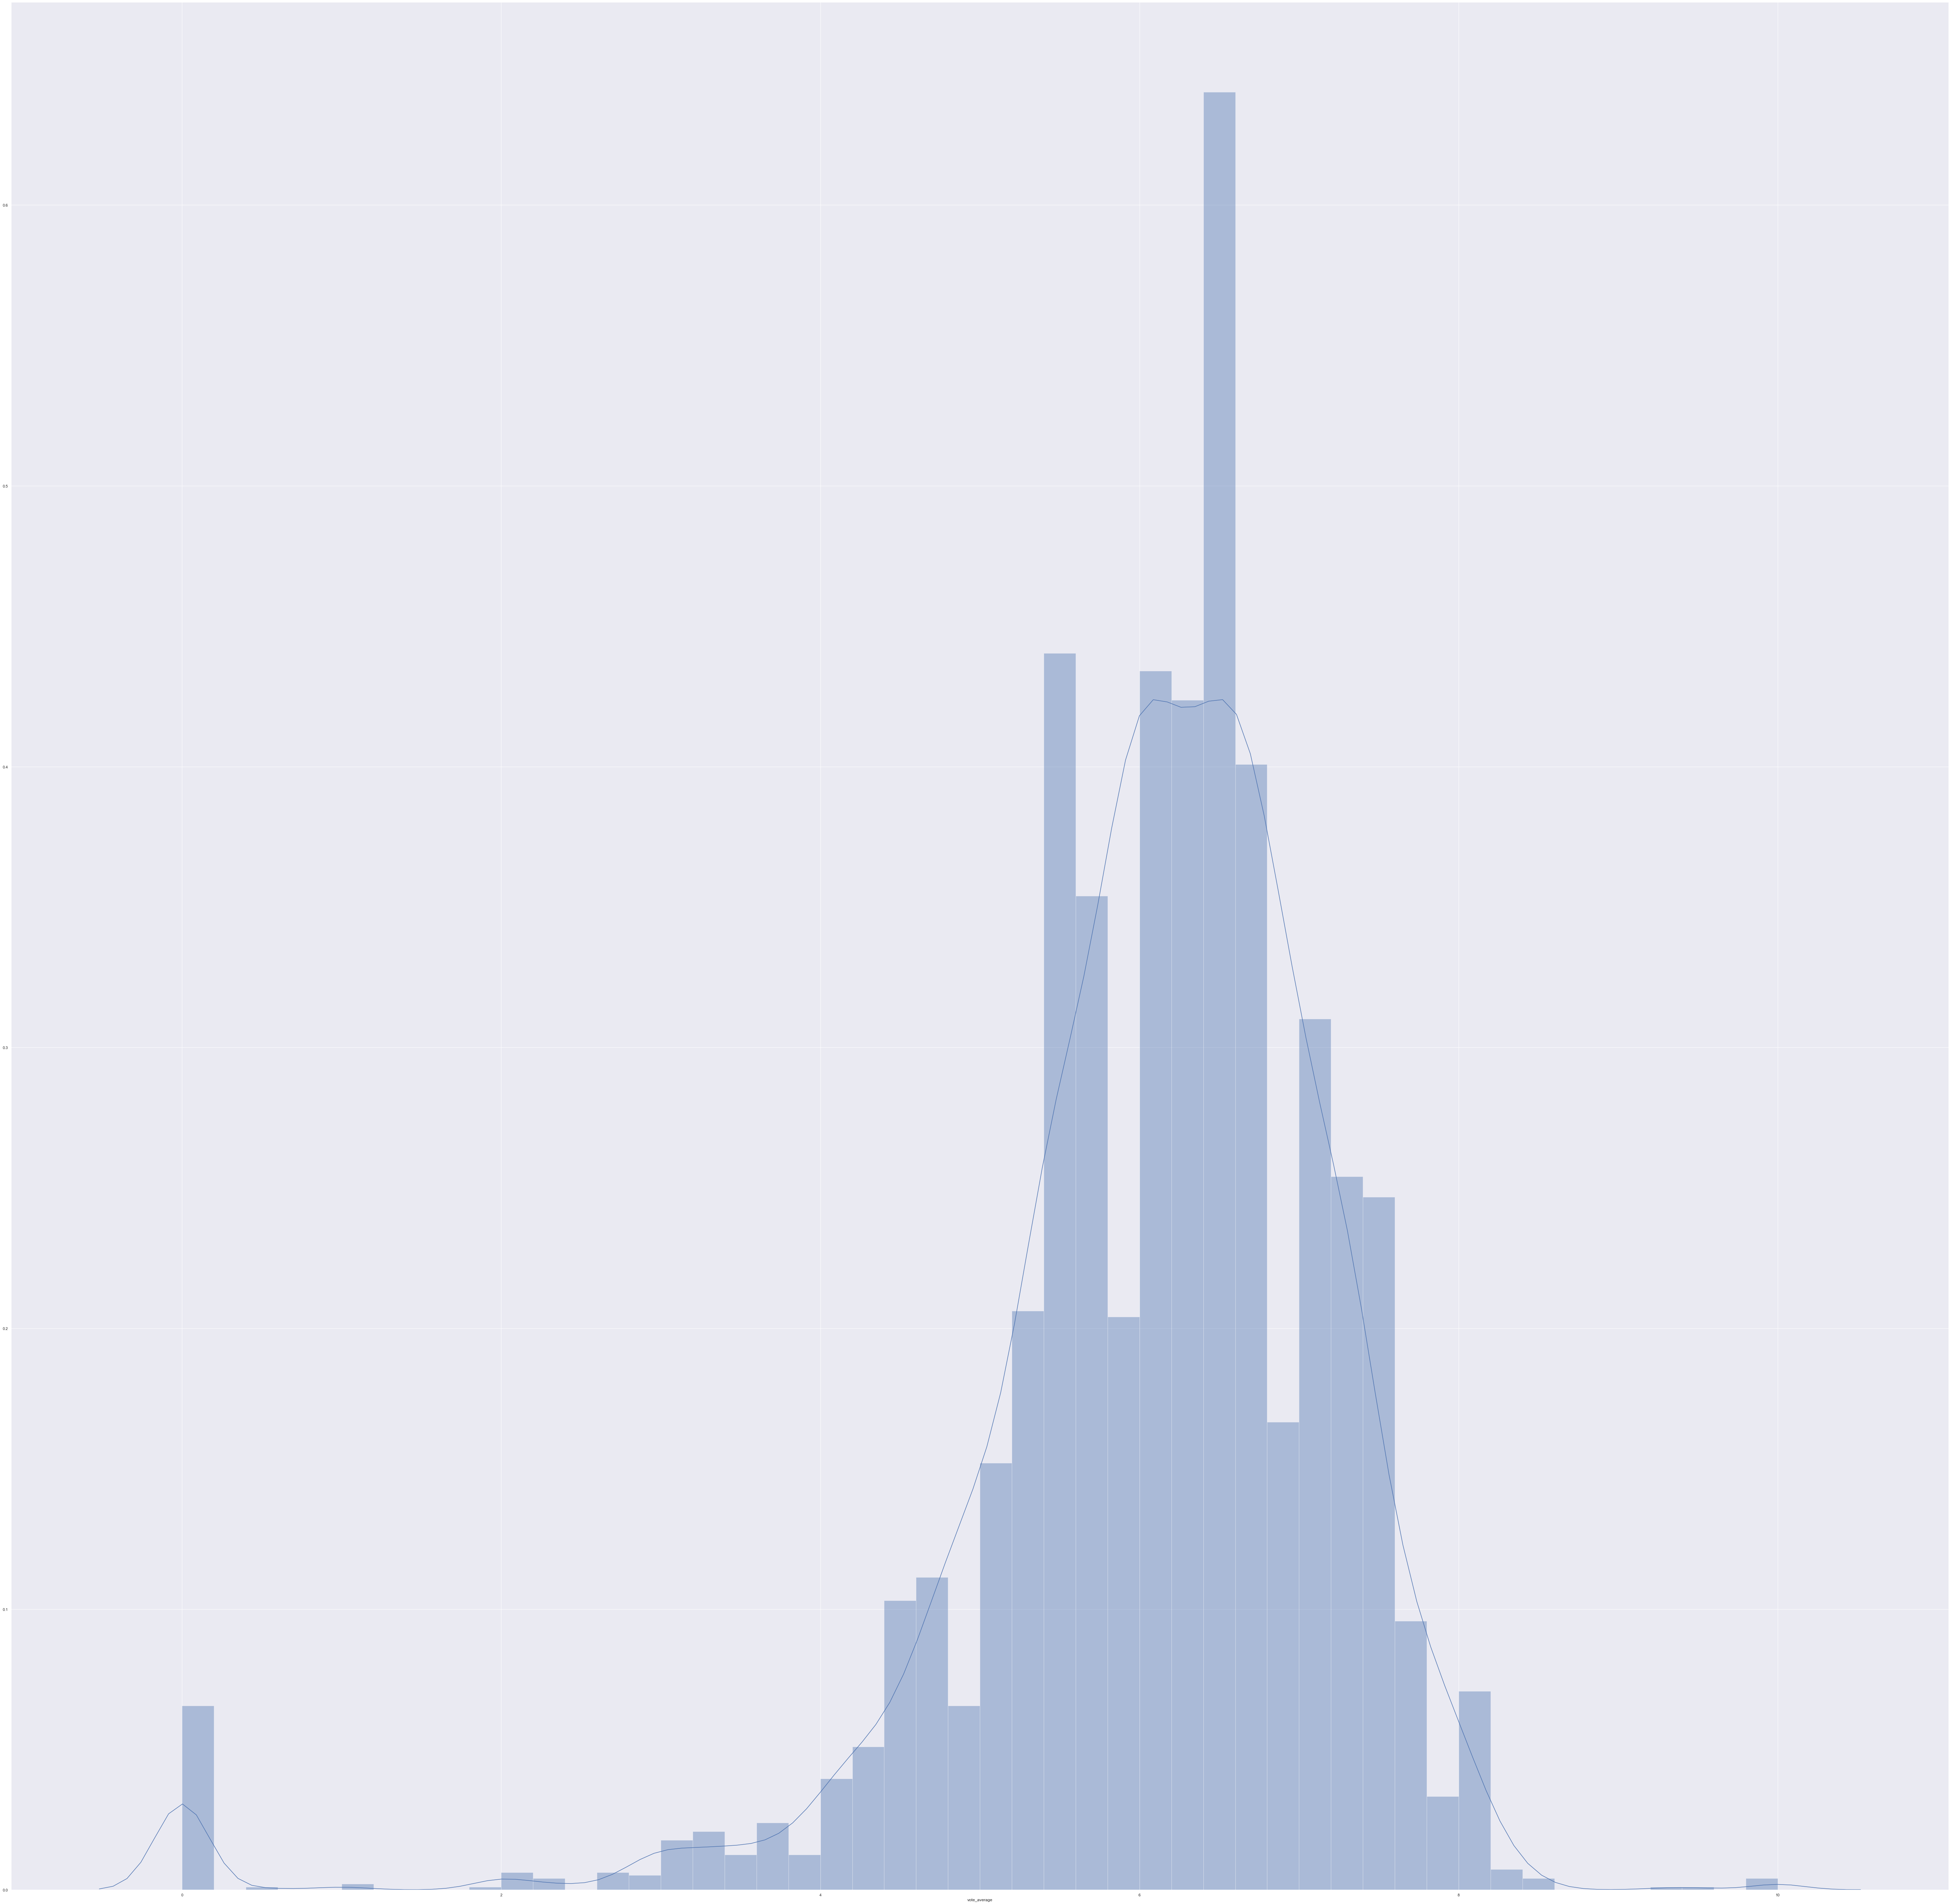

In [38]:
vote_avg = all_movies['vote_average']
sns.distplot(vote_avg)

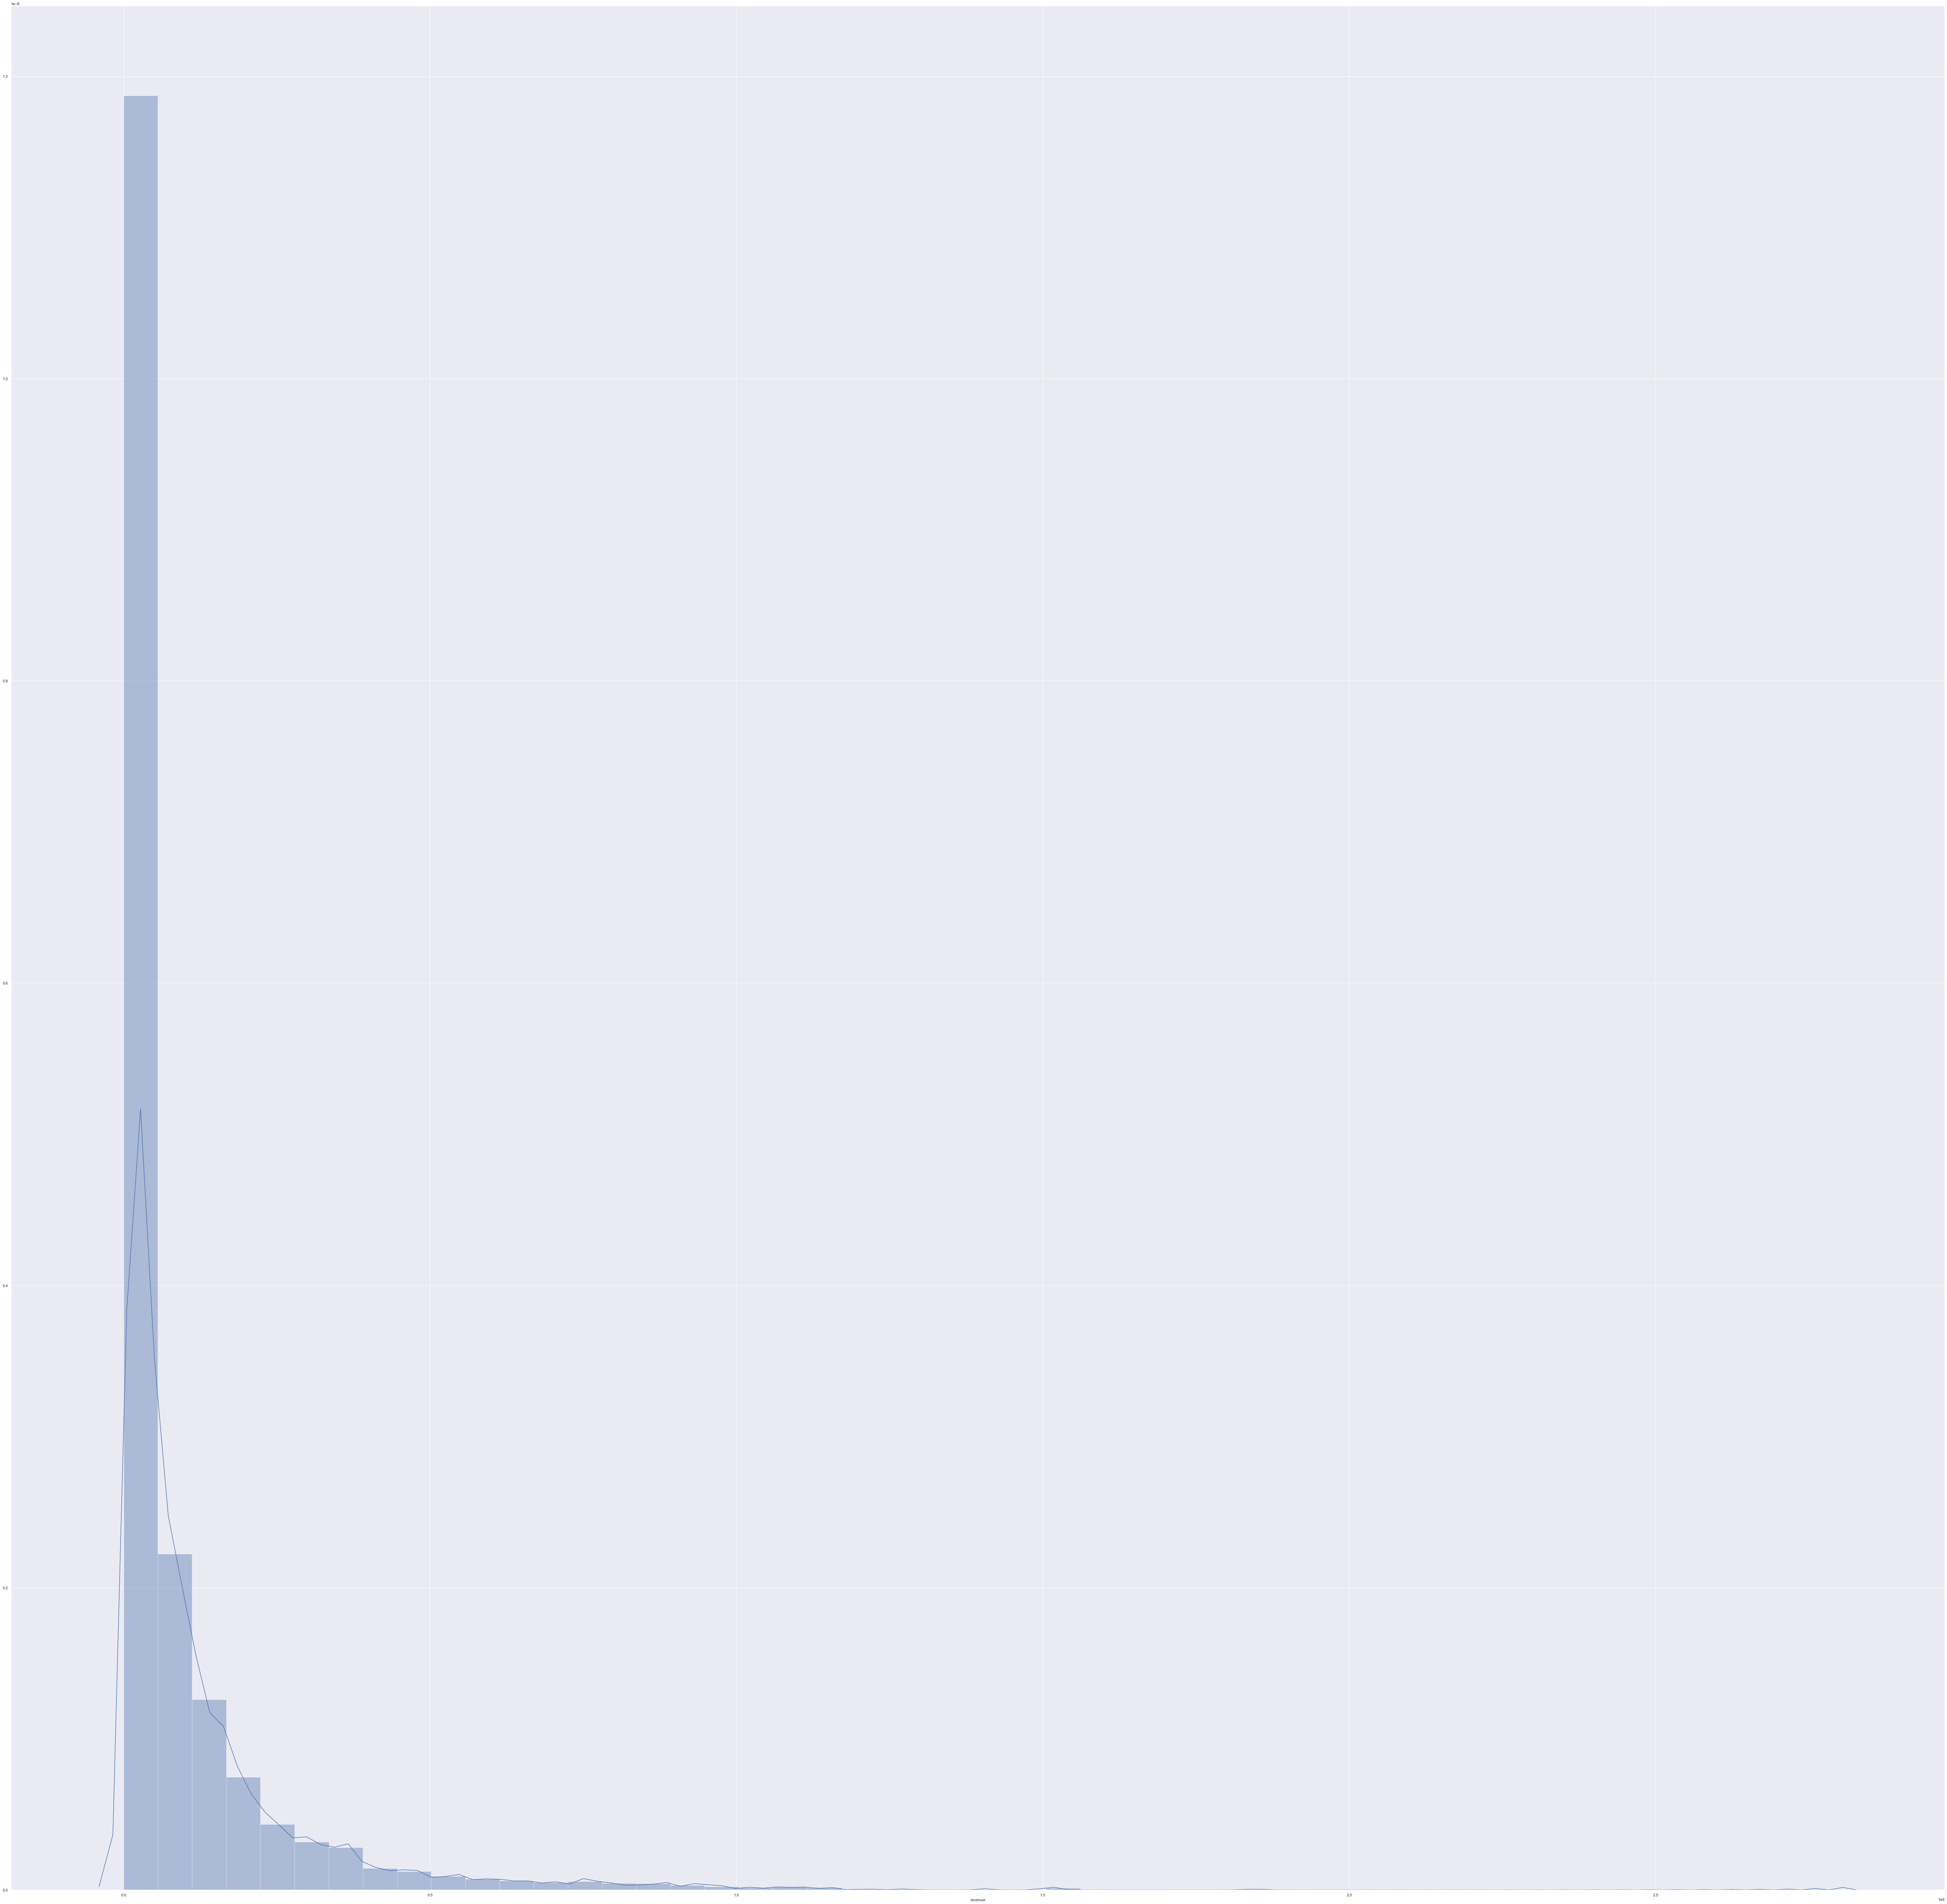

In [40]:
revenue = all_movies['revenue']
sns.distplot(revenue)

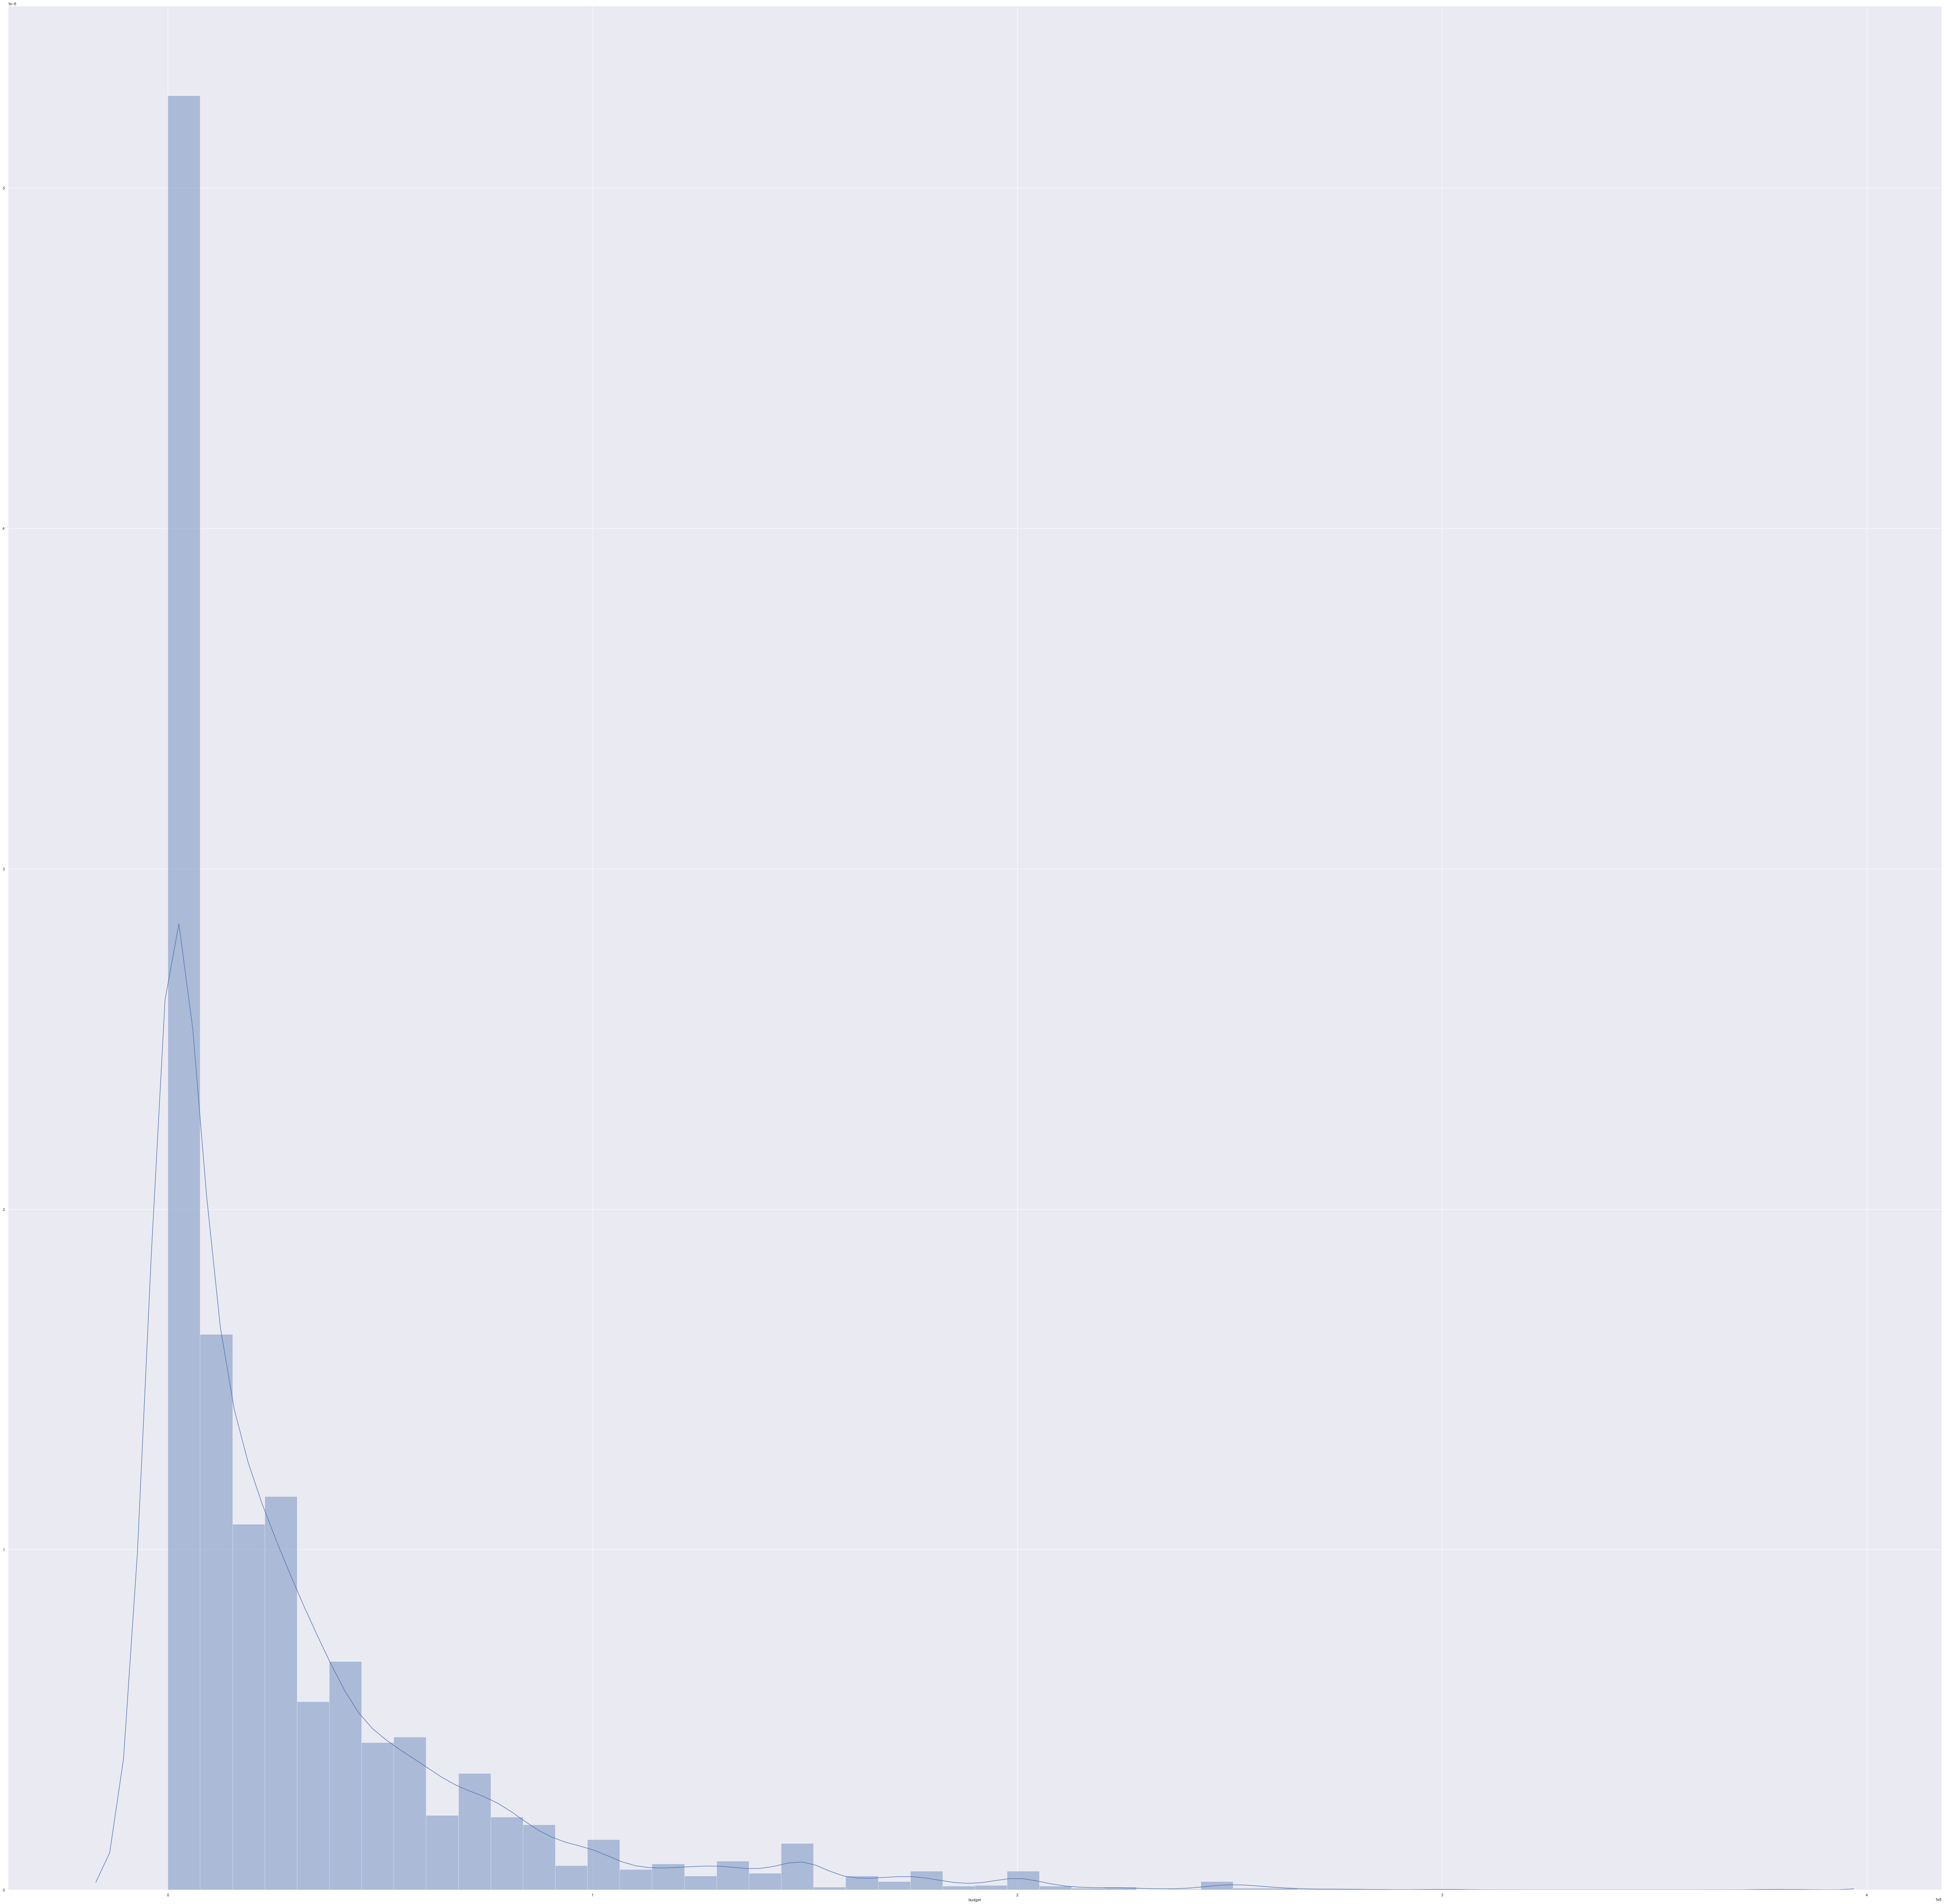

In [41]:
budget = all_movies['budget']
sns.distplot(budget)

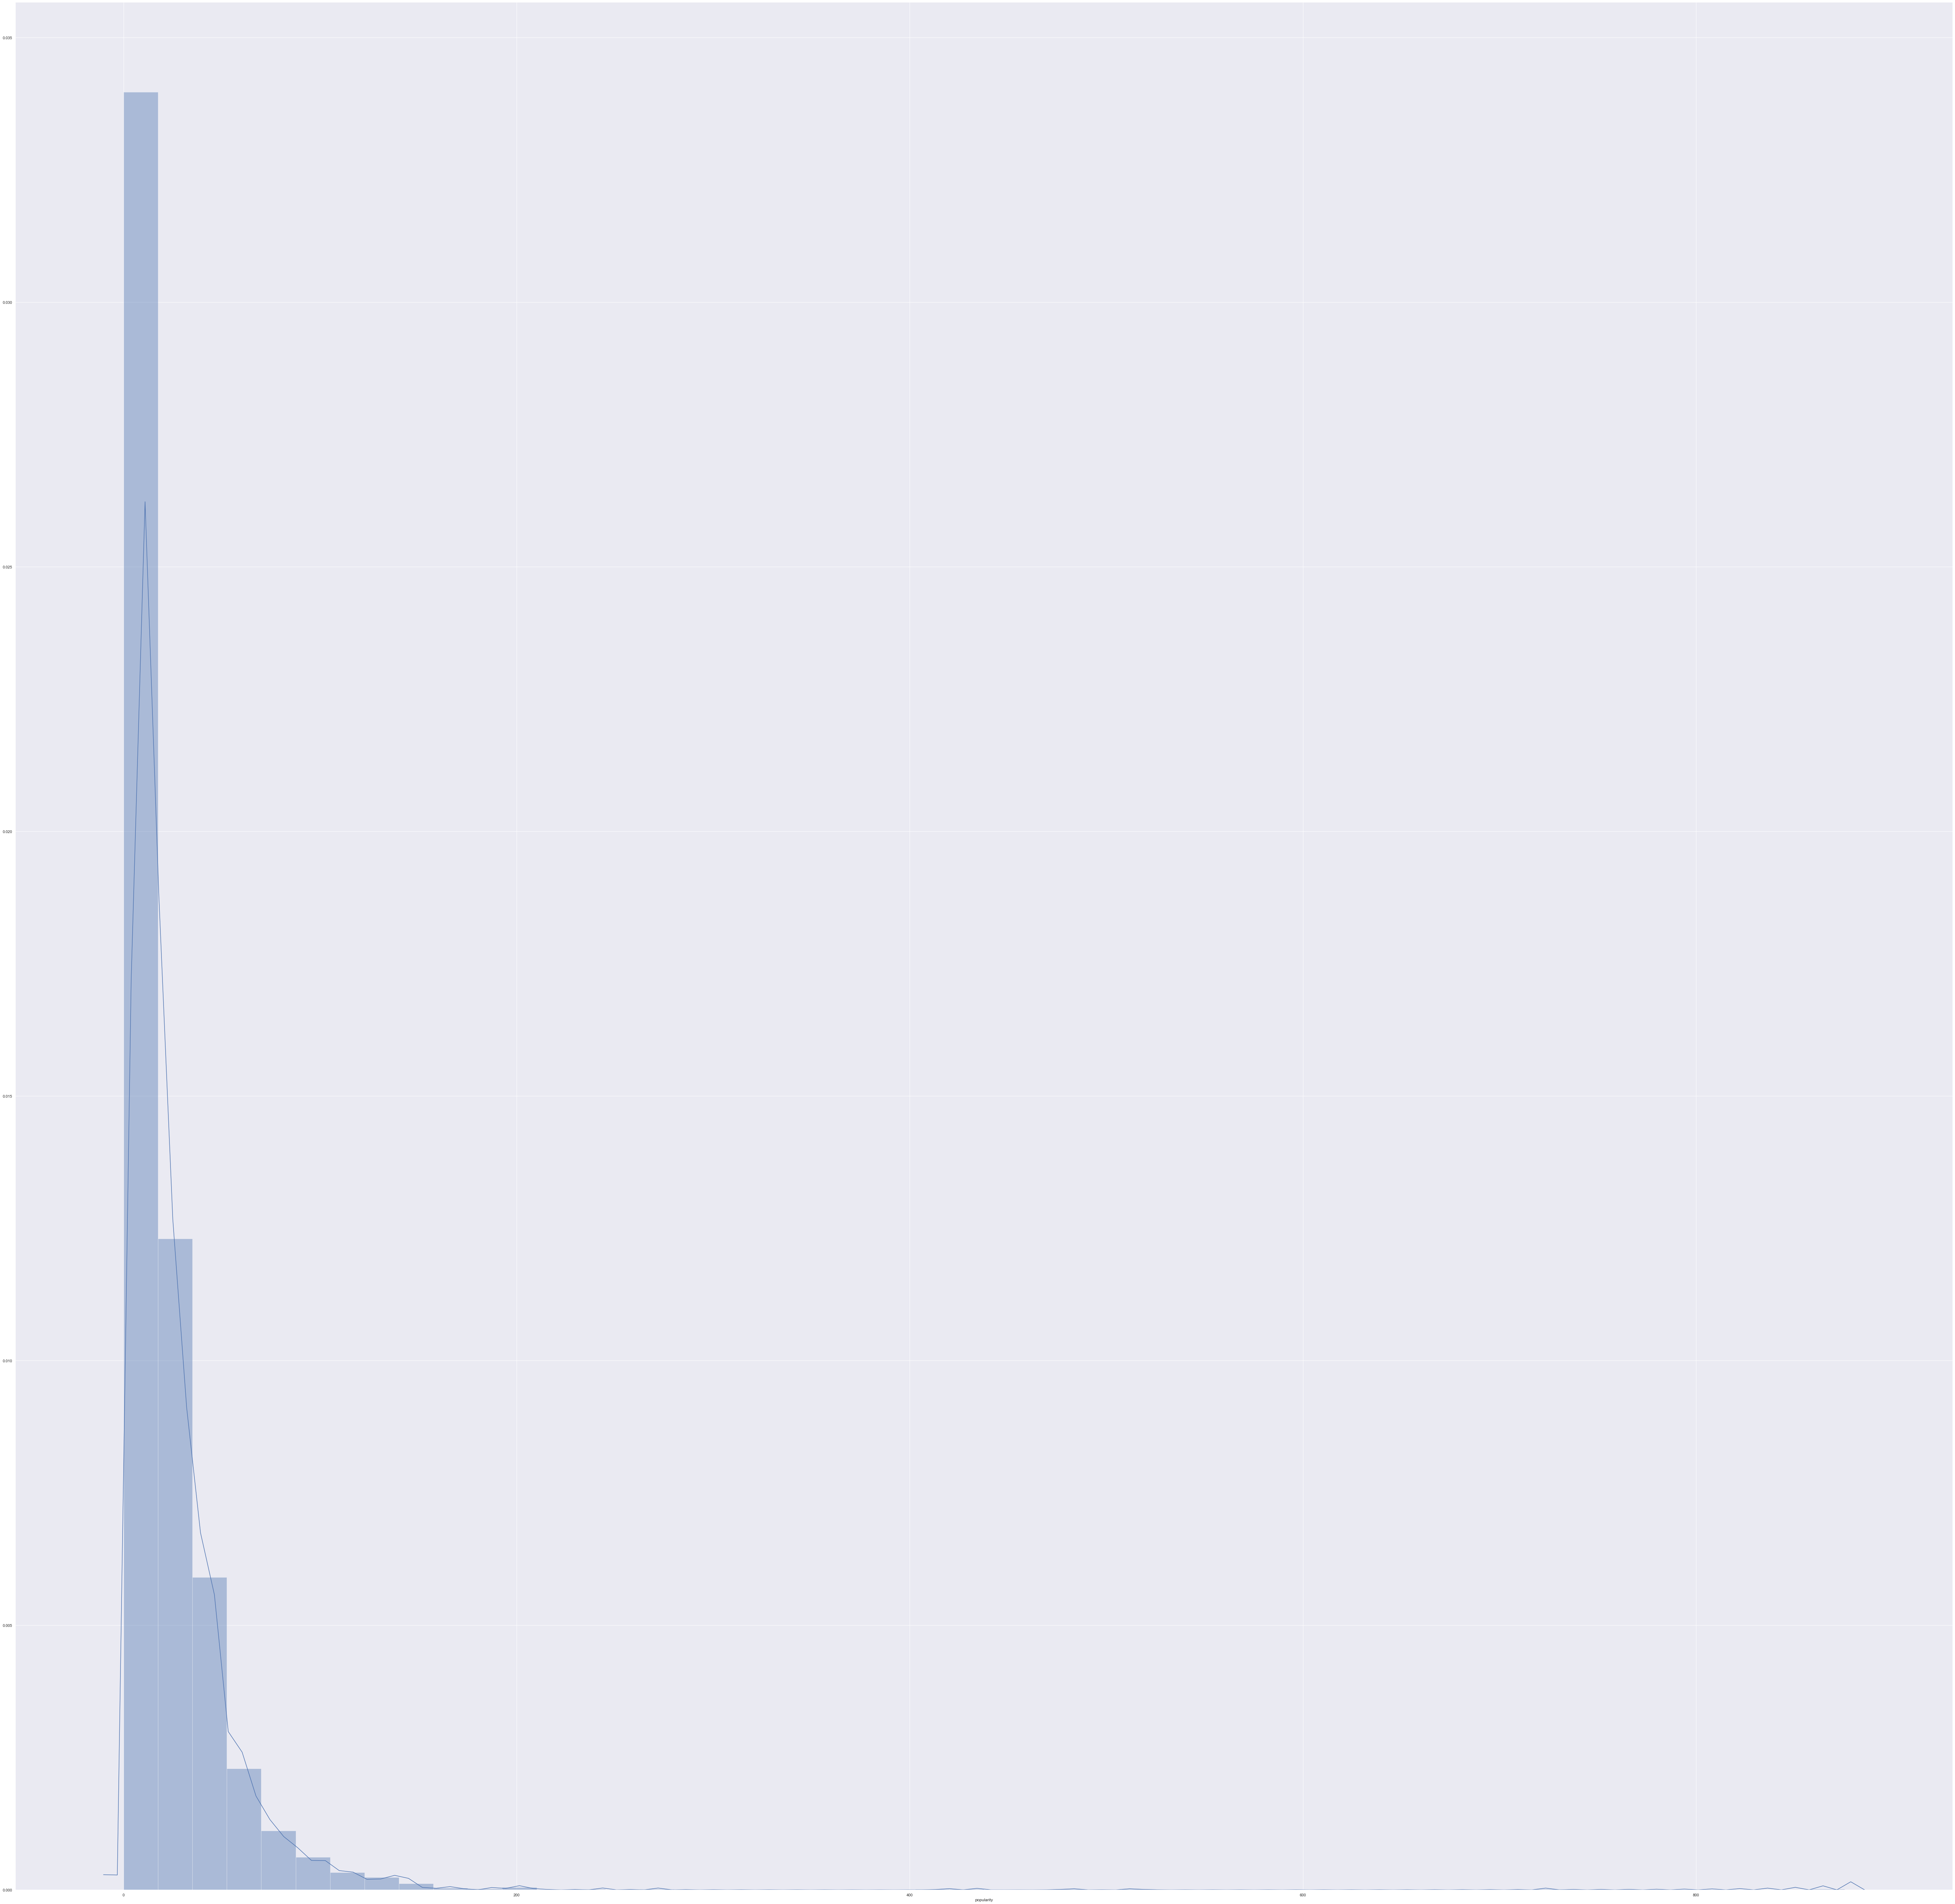

In [42]:
pop = all_movies['popularity']
sns.distplot(pop)

## Data Analysis, Visualization, and Insights
[Back to Contents](#Contents)

Now that we have a usable data set, we wanted to do some basic data exploration. Some initial graphs we would like to produce to see if data is useful in prediction model are
* Does budget affect popularity?
* Does revenue affect popularity?
* Does time of year affect popularity?
* Does director affect popularity?

Investigating other columns require a bit more thought and manipulation, wanted to start with these graphs as investigation first

Text(0.5, 1.0, 'Budget against Popularity')

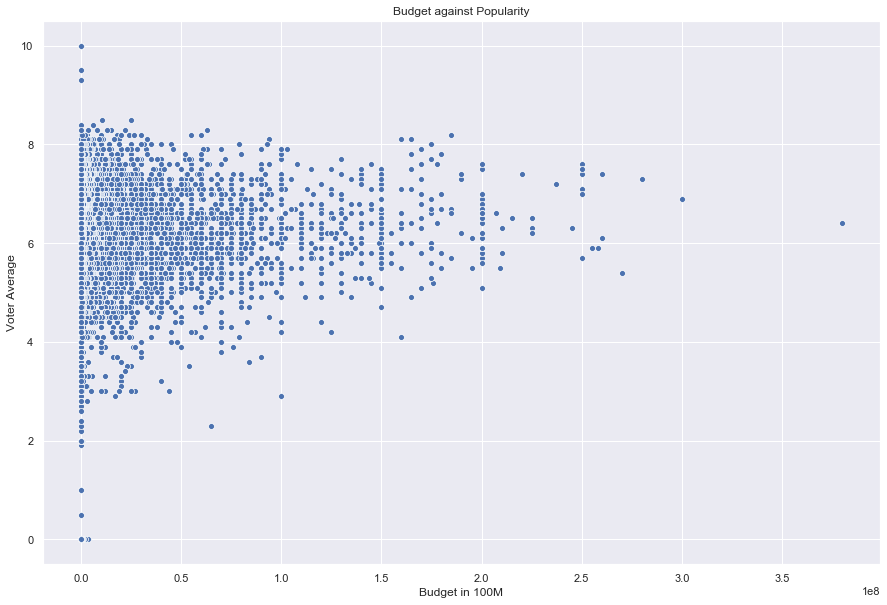

In [21]:
#Budget against Popularity

import seaborn as sns
import matplotlib.pyplot as plt

#plt.figure(figsize = (35,20))
#sns.lmplot(x='budget', y='vote_average', data=all_movies,
#           fit_reg=False) # No regression line

plt.figure(figsize=(15,10))

released_movies = all_movies[all_movies['status']=='Released']

sns.set(style='darkgrid')
ax = sns.scatterplot(x='budget', y='vote_average', data=released_movies)
plt.xlabel('Budget in 100M')
plt.ylabel('Voter Average')
plt.title('Budget against Popularity')


From this we see that there is a much stronger correlation to budget and popularity with higher budget films. Higher budget fims tended to have a higher voter review. On the other hand, the correlation coefficient is very low with lower budget films. Lower budget films have voter popularity that span from high to low. 

Few questions form this graph:
1. Which movie that had 0 budget scored a 10 in voter popularity? Is this a mistake?
2. Can discrete variable help in tightening this distribution like genre? For example do action movies need higher budget to have higher voter review? Can horror films have a high voter review on low budget?

Text(0.5, 1.0, 'Budget against Popularity')

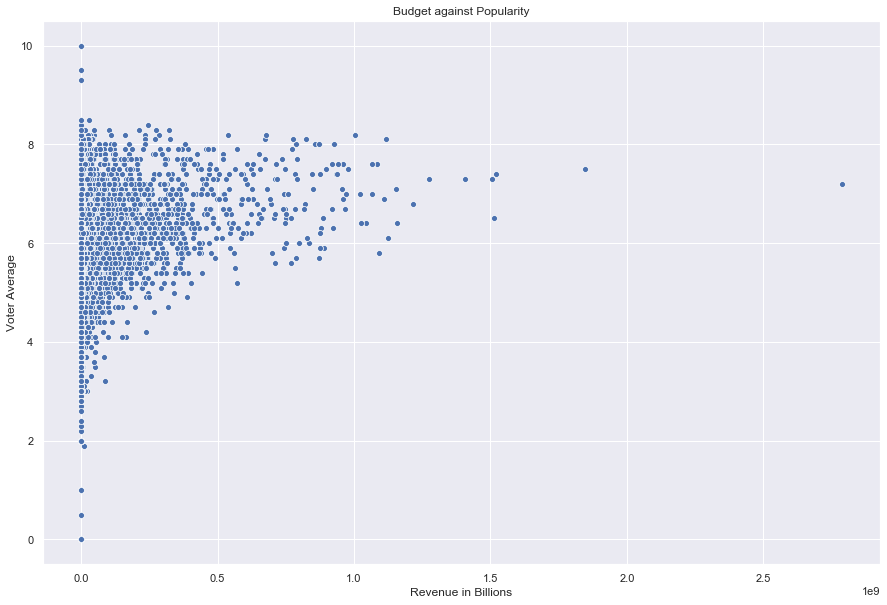

In [22]:
#Revenue against Popularity

plt.figure(figsize=(15,10))

released_movies = all_movies[all_movies['status']=='Released']

sns.set(style='darkgrid')
ax = sns.scatterplot(x='revenue', y='vote_average', data=released_movies)
plt.xlabel('Revenue in Billions')
plt.ylabel('Voter Average')
plt.title('Budget against Popularity')


Surprisingly with this, there is still a poor correlation between revenue to voter average with smaller budget films. Even though I was expecting the data to be more telling, the correlation is better and it is easier to notice a more asymptotic distribution here.

In [23]:
from datetime import datetime

all_movies['release_date'] = pd.to_datetime(all_movies['release_date'])
all_movies['release_year'] = all_movies['release_date'].dt.year
all_movies['release_month'] = all_movies['release_date'].dt.month

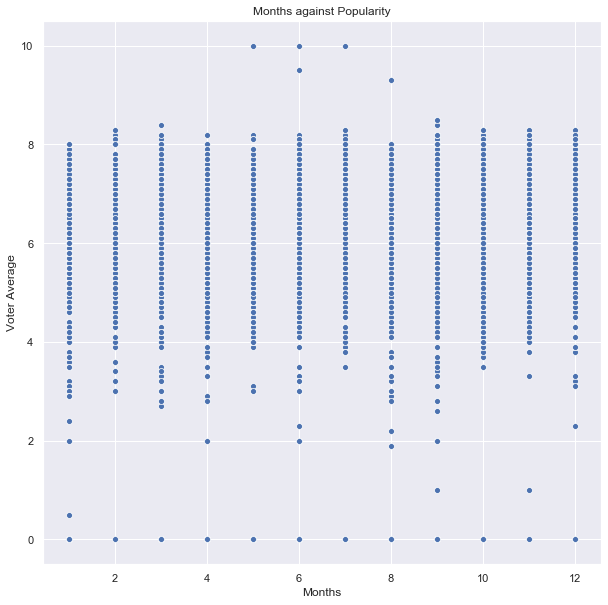

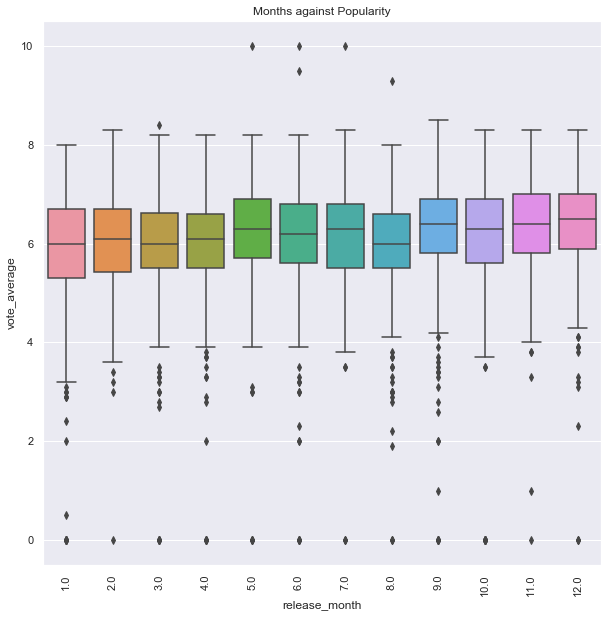

In [24]:
#Exploritory analysis of movie rating to time in the year

plt.figure(figsize=(10,10))

released_movies = all_movies[all_movies['status']=='Released']

sns.set(style='darkgrid')
ax = sns.scatterplot(x='release_month', y='vote_average', data=released_movies)
plt.xlabel('Months')
plt.ylabel('Voter Average')
plt.title('Months against Popularity')


plt.figure(figsize = (10,10))
ax = sns.boxplot(x='release_month', y='vote_average', data=released_movies)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Months against Popularity');


In [25]:
# Exploring movie genres

movie_genres = pd.DataFrame(all_movies[['movie_id', 'budget', 'title','release_year', 'release_month','director','genres','revenue','vote_average','vote_count']])
movie_genres.head()

,movie_id,budget,title,release_year,release_month,director,genres,revenue,vote_average,vote_count
0,19995,237000000,Avatar,2009.0,12.0,James Cameron,"Action,Adventure,Fantasy,Science Fiction",2787965087,7.2,11800
1,285,300000000,Pirates of the Caribbean: At World's End,2007.0,5.0,Gore Verbinski,"Adventure,Fantasy,Action",961000000,6.9,4500
2,206647,245000000,Spectre,2015.0,10.0,Sam Mendes,"Action,Adventure,Crime",880674609,6.3,4466
3,49026,250000000,The Dark Knight Rises,2012.0,7.0,Christopher Nolan,"Action,Crime,Drama,Thriller",1084939099,7.6,9106
4,49529,260000000,John Carter,2012.0,3.0,Andrew Stanton,"Action,Adventure,Science Fiction",284139100,6.1,2124


In [26]:
genres_list = set()
for genre in all_movies['genres'].str.split(','):
    genres_list = set().union(genre, genres_list)
genres_list = list(genres_list)
genres_list.remove('')
genres_list

['Crime',
 'Family',
 'TV Movie',
 'Fantasy',
 'War',
 'Animation',
 'Action',
 'Documentary',
 'Comedy',
 'Adventure',
 'Horror',
 'Science Fiction',
 'History',
 'Romance',
 'Western',
 'Foreign',
 'Thriller',
 'Drama',
 'Music',
 'Mystery']

In [27]:
#Transform categorical to one hot encoding
for genres in genres_list:
    movie_genres[genres] = movie_genres['genres'].str.contains(genres).apply(lambda x:1 if x else 0)

In [28]:
movie_genres.head()

,movie_id,budget,title,release_year,release_month,director,genres,revenue,vote_average,vote_count,...,Horror,Science Fiction,History,Romance,Western,Foreign,Thriller,Drama,Music,Mystery
0,19995,237000000,Avatar,2009.0,12.0,James Cameron,"Action,Adventure,Fantasy,Science Fiction",2787965087,7.2,11800,...,0,1,0,0,0,0,0,0,0,0
1,285,300000000,Pirates of the Caribbean: At World's End,2007.0,5.0,Gore Verbinski,"Adventure,Fantasy,Action",961000000,6.9,4500,...,0,0,0,0,0,0,0,0,0,0
2,206647,245000000,Spectre,2015.0,10.0,Sam Mendes,"Action,Adventure,Crime",880674609,6.3,4466,...,0,0,0,0,0,0,0,0,0,0
3,49026,250000000,The Dark Knight Rises,2012.0,7.0,Christopher Nolan,"Action,Crime,Drama,Thriller",1084939099,7.6,9106,...,0,0,0,0,0,0,1,1,0,0
4,49529,260000000,John Carter,2012.0,3.0,Andrew Stanton,"Action,Adventure,Science Fiction",284139100,6.1,2124,...,0,1,0,0,0,0,0,0,0,0


In [29]:
genre_count = []
for genre in genres_list:
    genre_count.append([genre, movie_genres[genre].values.sum()])
genre_count

[['Crime', 696],
 ['Family', 513],
 ['TV Movie', 8],
 ['Fantasy', 424],
 ['War', 144],
 ['Animation', 234],
 ['Action', 1154],
 ['Documentary', 110],
 ['Comedy', 1722],
 ['Adventure', 790],
 ['Horror', 519],
 ['Science Fiction', 535],
 ['History', 197],
 ['Romance', 894],
 ['Western', 82],
 ['Foreign', 34],
 ['Thriller', 1274],
 ['Drama', 2297],
 ['Music', 185],
 ['Mystery', 348]]

In [30]:
# Creating a dataframe object from genre list
genre_df = pd.DataFrame(genre_count) 

In [31]:
genre_df=genre_df.rename(columns = {0:'genre', 1:'count'})

In [32]:
genre_df

,genre,count
0,Crime,696
1,Family,513
2,TV Movie,8
3,Fantasy,424
4,War,144
5,Animation,234
6,Action,1154
7,Documentary,110
8,Comedy,1722
9,Adventure,790


Text(0.5, 1.0, 'Count of number of Movies in each Genre')

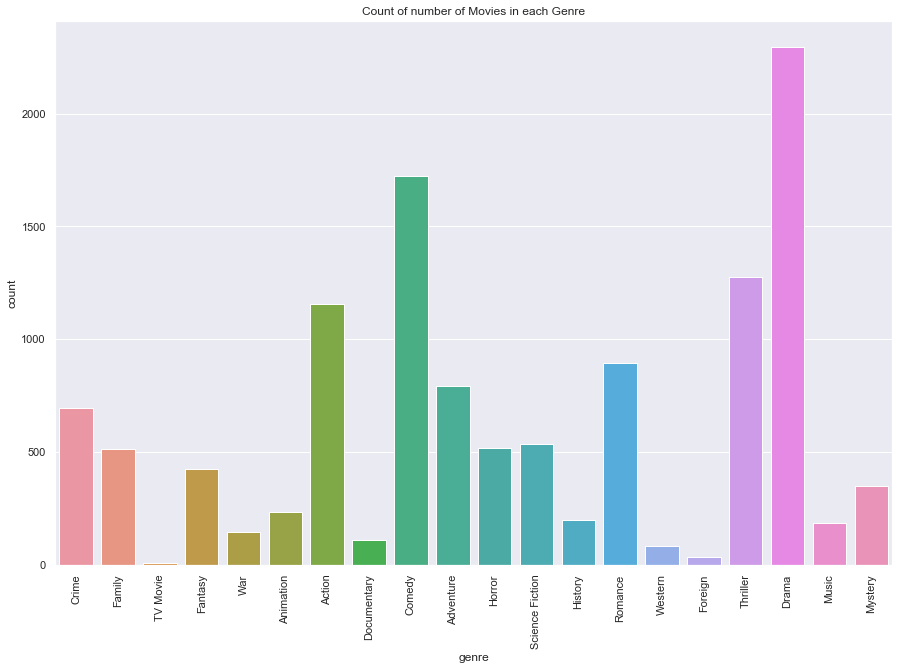

In [33]:
plt.figure(figsize=(15,10))

sns.set(style='darkgrid')
ax = sns.barplot(x='genre', y='count', data=genre_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('genre')
plt.ylabel('count')
plt.title('Count of number of Movies in each Genre')

Text(0.5, 1.0, 'Budget against Popularity')

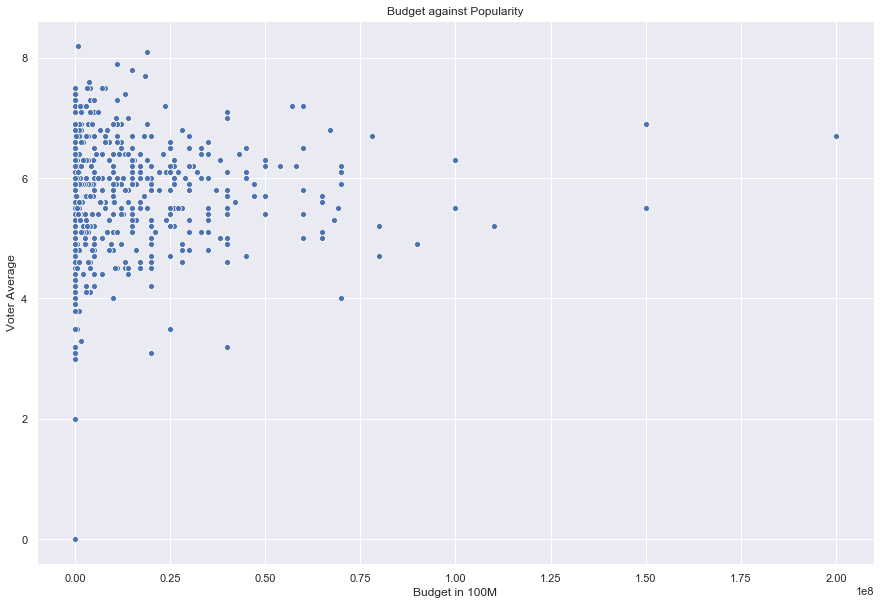

In [34]:
plt.figure(figsize=(15,10))

drama_movies = movie_genres[movie_genres['Horror']==1]

sns.set(style='darkgrid')
ax = sns.scatterplot(x='budget', y='vote_average', data=drama_movies)
plt.xlabel('Budget in 100M')
plt.ylabel('Voter Average')
plt.title('Budget against Popularity')

In [35]:
movie_genres.to_csv('./data/movie.csv', index =False)

# Machine Learning

In [36]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [37]:
def label (row):
    if row['vote_average'] < 3.0:
        return 1
    if row['vote_average'] >= 3.0 and row['vote_average'] <5.0:
        return 2
    if row['vote_average'] >= 5.0 and row['vote_average'] <7.0:
        return 3
    if row['vote_average'] >= 7.0 and row['vote_average'] <=10.0:
        return 4

In [38]:
movie_genres['label']= movie_genres.apply (lambda row: label(row), axis=1)

In [39]:
movie_genres.drop('movie_id', axis=1, inplace=True)
movie_genres.head()

,budget,title,release_year,release_month,director,genres,revenue,vote_average,vote_count,Crime,...,Science Fiction,History,Romance,Western,Foreign,Thriller,Drama,Music,Mystery,label
0,237000000,Avatar,2009.0,12.0,James Cameron,"Action,Adventure,Fantasy,Science Fiction",2787965087,7.2,11800,0,...,1,0,0,0,0,0,0,0,0,4
1,300000000,Pirates of the Caribbean: At World's End,2007.0,5.0,Gore Verbinski,"Adventure,Fantasy,Action",961000000,6.9,4500,0,...,0,0,0,0,0,0,0,0,0,3
2,245000000,Spectre,2015.0,10.0,Sam Mendes,"Action,Adventure,Crime",880674609,6.3,4466,1,...,0,0,0,0,0,0,0,0,0,3
3,250000000,The Dark Knight Rises,2012.0,7.0,Christopher Nolan,"Action,Crime,Drama,Thriller",1084939099,7.6,9106,1,...,0,0,0,0,0,1,1,0,0,4
4,260000000,John Carter,2012.0,3.0,Andrew Stanton,"Action,Adventure,Science Fiction",284139100,6.1,2124,0,...,1,0,0,0,0,0,0,0,0,3


## Feature Selection

In [40]:
genre_corr = movie_genres.corr()
genre_corr['label'].sort_values()

release_year      -0.186258
Horror            -0.136831
Comedy            -0.091580
Action            -0.055185
Thriller          -0.050513
Science Fiction   -0.039934
Family            -0.020912
TV Movie          -0.005239
Fantasy           -0.003451
Foreign            0.013846
Mystery            0.017353
Adventure          0.019359
Western            0.025683
Romance            0.031679
Music              0.038830
Documentary        0.042597
Animation          0.043047
Crime              0.049069
budget             0.085637
War                0.092699
History            0.102128
release_month      0.108238
revenue            0.194018
Drama              0.217500
vote_count         0.317633
vote_average       0.867878
label              1.000000
Name: label, dtype: float64

Feature Selection based off of simple filtering

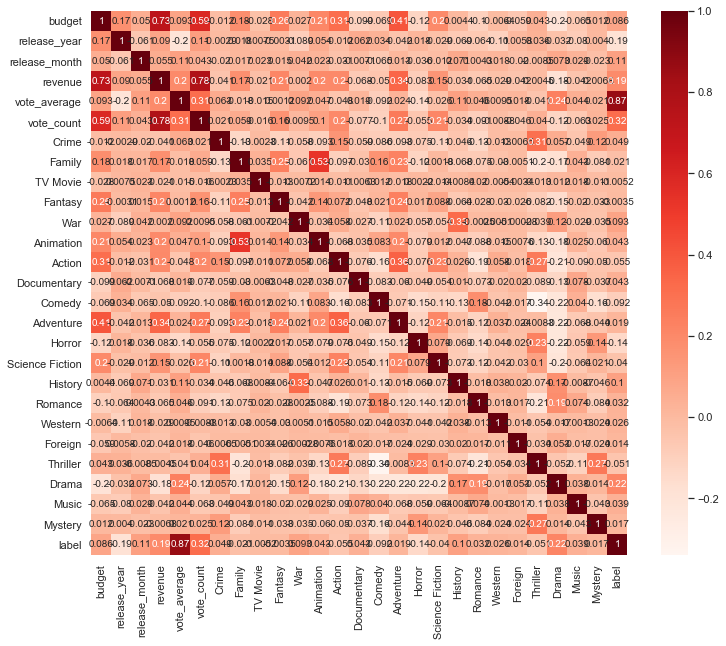

In [41]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = movie_genres.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The most correlated features can be changed based on the threshold cor_target (We set to 0.08). HAve to be weary of this so not to overfit the model

In [56]:
#Correlation with output variable
cor_target = abs(cor["label"])
#Selecting highly correlated features
relevant_features = cor_target[(cor_target>0.1)]
relevant_features

release_year     0.186258
release_month    0.108238
revenue          0.194018
vote_average     0.867878
vote_count       0.317633
Horror           0.136831
History          0.102128
Drama            0.217500
label            1.000000
Name: label, dtype: float64

For right now we will try to test the model with this simple feature selection. Only using the filtered features right now

In [57]:
test_group1 = movie_genres[['label', 'release_year', 'release_month', 'revenue', 'vote_count','Drama','History','Horror']]

In [58]:
#Cleaning up the data
test_group1.dropna()

,label,release_year,release_month,revenue,vote_count,Drama,History,Horror
0,4,2009.0,12.0,2787965087,11800,0,0,0
1,3,2007.0,5.0,961000000,4500,0,0,0
2,3,2015.0,10.0,880674609,4466,0,0,0
3,4,2012.0,7.0,1084939099,9106,1,0,0
4,3,2012.0,3.0,284139100,2124,0,0,0
...,...,...,...,...,...,...,...,...
4798,3,1992.0,9.0,2040920,238,0,0,0
4799,3,2011.0,12.0,0,5,0,0,0
4800,4,2013.0,10.0,0,6,1,0,0
4801,3,2012.0,5.0,0,7,0,0,0


In [59]:
test_group1.loc[test_group1['release_year'].isnull()]

,label,release_year,release_month,revenue,vote_count,Drama,History,Horror
4553,1,NaN,NaN,0,0,0,0,0


In [60]:
test_group1.drop(4553, axis=0, inplace=True)

C:\Users\Kaavya Krishna-Kumar\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [61]:
#Feature Matrix
X = test_group1.drop("label",1)   
#Target Variable
y = test_group1["label"]     

In [62]:
#confirming that there are no null values.
test_group1.isnull().sum()

label            0
release_year     0
release_month    0
revenue          0
vote_count       0
Drama            0
History          0
Horror           0
dtype: int64

## Splitting Data to Trainging and Test Data

In [63]:
#splitting the data into training and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [64]:
#shape of the train and test objects
print(X_train.shape)
print(X_test.shape)

(3841, 7)
(961, 7)


In [65]:
#shape of the y objects
print(y_train.shape)
print(y_test.shape)

(3841,)
(961,)


## Testing K-Nearest-Neighbors (KNN) Algorithm

In [66]:
#import the KNeighborsClassifier class from the sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,25)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    

Text(0, 0.5, 'Testing Accuracy')

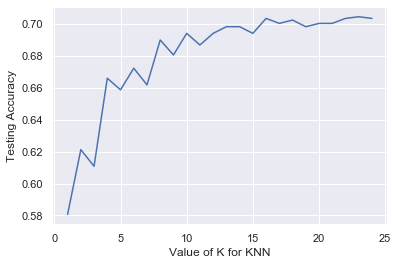

In [67]:
#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

We can see there is a raise and fall in the accuracy and it is quite typical when examining the model complexity with the accuracy.From here we can see that a K value of 16 has the optimal K value. We will retrain the model with the available with the new K value. 

I am a bit concerned that this might result in overfitting but lets see.

In [68]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [69]:
#renaming the classes
classes = {1:'bad', 2:'okay', 3:'good', 4:'excellent'}
# make up some random test data ..

In [71]:
# making confusion matrix between 
#  test set of Y and predicted value. 
from sklearn.metrics import confusion_matrix 
  
cm = confusion_matrix(y_test, y_pred) 
cm

array([[ 11,   1,   8,   0],
       [  1,   1,  74,   0],
       [  3,   6, 657,  10],
       [  1,   0, 181,   7]], dtype=int64)